In [3]:
import numpy as np              # NumPy is a Python library used for working with arrays.
import pandas as pd             # Pandas is a Python library used for working with data sets.
import matplotlib.pyplot as plt # Matplotlib is a plotting library for creating static, animated, and interactive visualizations.
import seaborn as sns           # Seaborn is a library that uses Matplotlib underneath to plot graphs.
                                # It will be used to visualize random distributions.


In [47]:
df = pd.read_csv('C:\\Users\\mrhit\\Downloads\\Internlite Course\\Mini Project\\BankChurners.csv')
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
df.shape  #number of elements in each dimension.

(10127, 21)

In [7]:
df.isnull().sum()/(len(df))*100

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

In [11]:
df.isnull().any(axis=1).value_counts()

False    10127
dtype: int64

In [13]:
df.duplicated().value_counts()

False    10127
dtype: int64

In [14]:
df.duplicated().sum()

0

In [24]:
mean1=df['Customer_Age'].mean()    # Mean of the age column. 
print('Mean = ', mean1)

Mean =  46.32596030413745


In [25]:
median1=df['Customer_Age'].median()  # Median of the age column.
print('Median = ',median1)

Median =  46.0


In [26]:
sd=df['Customer_Age'].std()   # Standard Deviation of the age column.
print('Standard Deviation = ',sd)

Standard Deviation =  8.016814032549084


In [27]:
import random

# Generate hypothetical monthly expenses data for two groups (Group A and Group B)
random.seed(42)

group_a_expenses = [random.randint(500, 1500) for _ in range(12)]  # Monthly expenses for Group A
group_b_expenses = [random.randint(600, 1600) for _ in range(12)]  # Monthly expenses for Group B

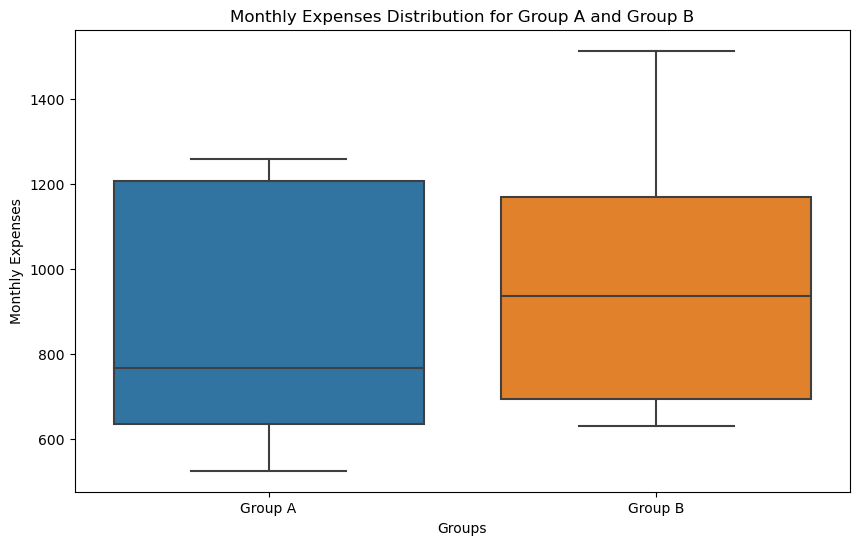

In [28]:
# Create a box plot for Group A and Group B expenses
plt.figure(figsize=(10, 6))
sns.boxplot(x=["Group A"] * 12 + ["Group B"] * 12, y=group_a_expenses + group_b_expenses)
plt.xlabel("Groups")
plt.ylabel("Monthly Expenses")
plt.title("Monthly Expenses Distribution for Group A and Group B")
plt.show()

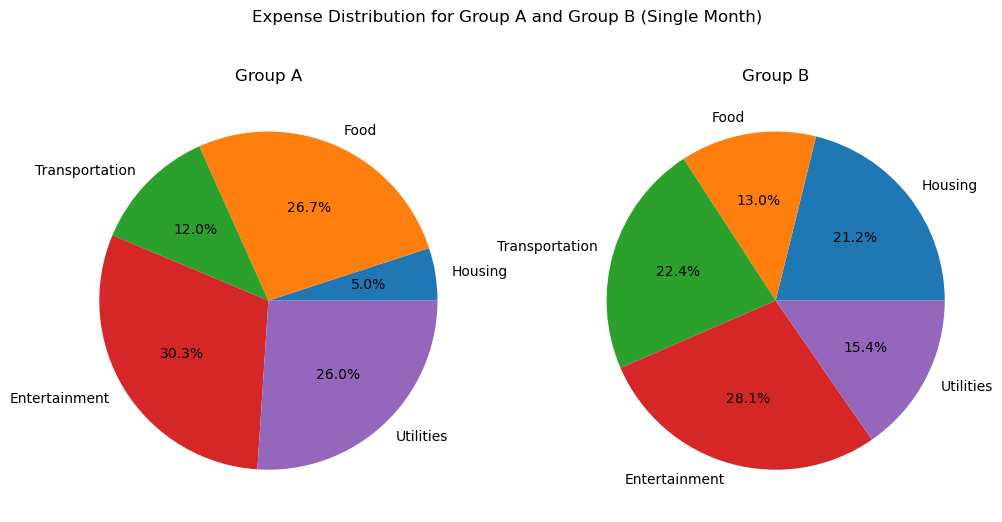

In [29]:
# Hypothetical expense categories
expense_categories = ["Housing", "Food", "Transportation", "Entertainment", "Utilities"]

# Generate random expenses for each category for a single month for Group A and Group B
group_a_monthly_expenses = [random.randint(100, 800) for _ in range(len(expense_categories))]
group_b_monthly_expenses = [random.randint(100, 800) for _ in range(len(expense_categories))]

# Create pie charts for a single month's expenses for both groups
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Expense Distribution for Group A and Group B (Single Month)")

# Pie chart for Group A
axes[0].pie(group_a_monthly_expenses, labels=expense_categories, autopct='%1.1f%%')
axes[0].set_title("Group A")

# Pie chart for Group B
axes[1].pie(group_b_monthly_expenses, labels=expense_categories, autopct='%1.1f%%')
axes[1].set_title("Group B")

plt.show()


In [33]:

# Box Plots: The box plots for Group A and Group B monthly expenses allow us to compare their distributions. 
#          We can observe if one group tends to have higher or lower expenses on average, as well as the spread of their expenses.

# Pie Charts: The pie charts show the breakdown of expenses into different categories for a single month for each group. 
#     We can compare how both groups allocate their expenses among categories, providing insights into their spending habits. 
#     For example, Group A might allocate more to housing, while Group B might spend more on entertainment.


<Figure size 1200x600 with 0 Axes>

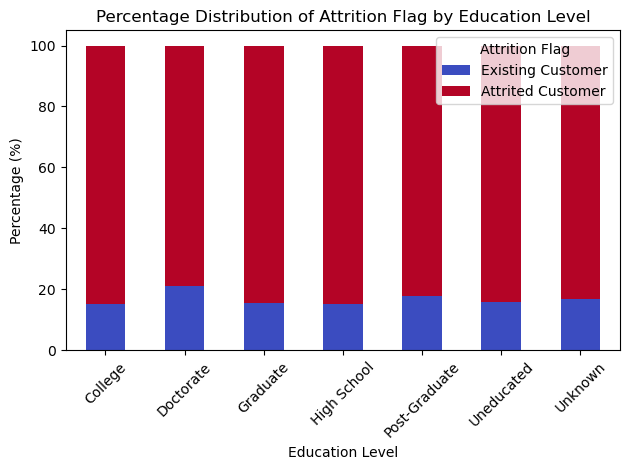

In [36]:
# Create a cross-tabulation (contingency table) between Education_Level and Attrition_Flag
cross_tab = pd.crosstab(df['Education_Level'], df['Attrition_Flag'], normalize='index') * 100

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
cross_tab.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Percentage Distribution of Attrition Flag by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.legend(title='Attrition Flag', loc='upper right', labels=['Existing Customer', 'Attrited Customer'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

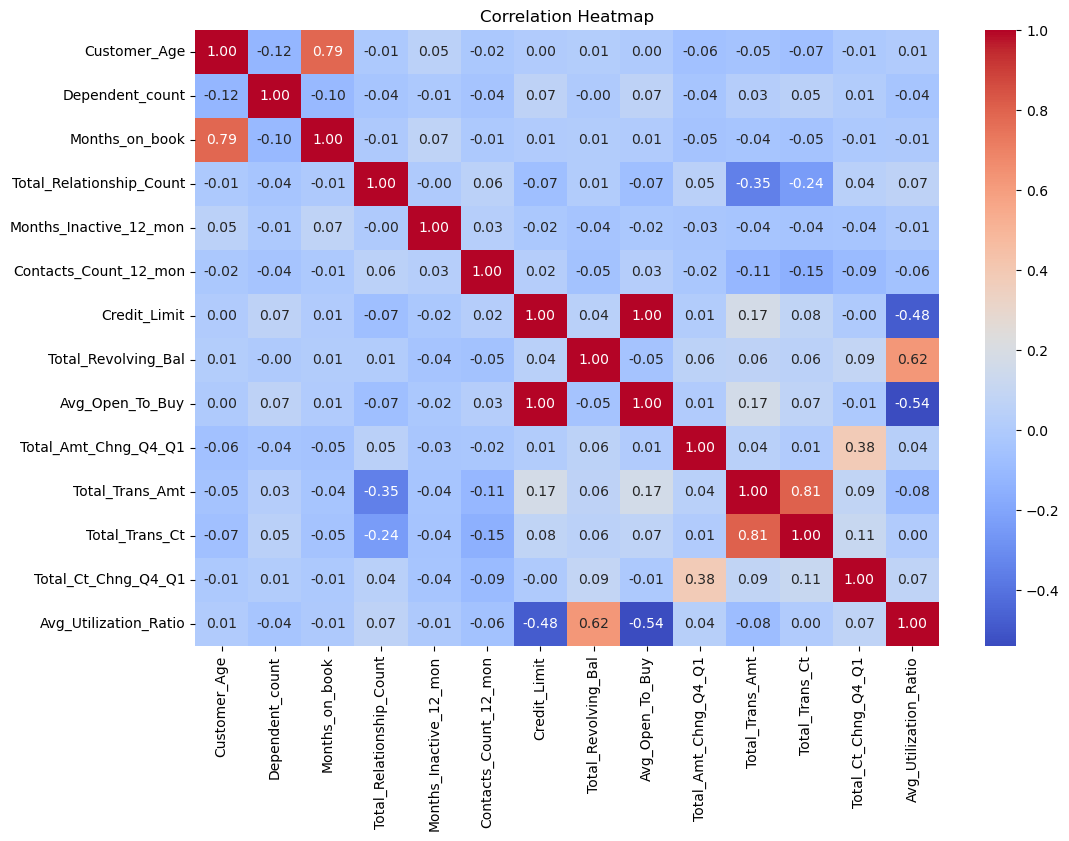

In [5]:
# Create a cross-tabulation (contingency table) between Income_Category and Attrition_Flag
cross_tab = pd.crosstab(df['Income_Category'], df['Attrition_Flag'], normalize='index') * 100

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
cross_tab.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Percentage Distribution of Attrition Flag by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Percentage (%)')
plt.legend(title='Attrition Flag', loc='upper right', labels=['Existing Customer', 'Attrited Customer'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\mrhit\AppData\Local\Temp\ipykernel_7948\3029621432.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numerical_columns.corr()


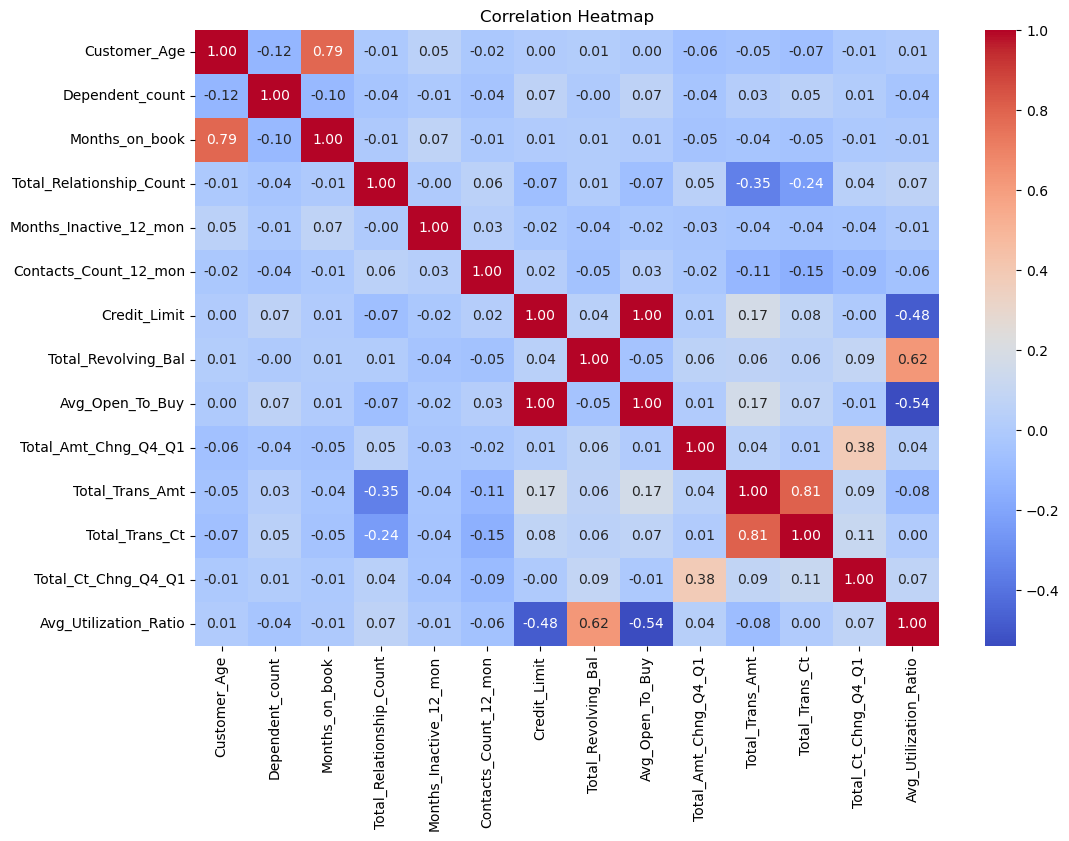

In [6]:
df = pd.read_csv('C:\\Users\\mrhit\\Downloads\\Internlite Course\\Mini Project\\BankChurners.csv')
# Drop the CLIENTNUM column
df = df.drop(columns=['CLIENTNUM'])

# Select all numerical columns (int64 and float64)
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Add the Attrition_Flag column to the sub-dataframe
numerical_columns['Attrition_Flag'] = df['Attrition_Flag']

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


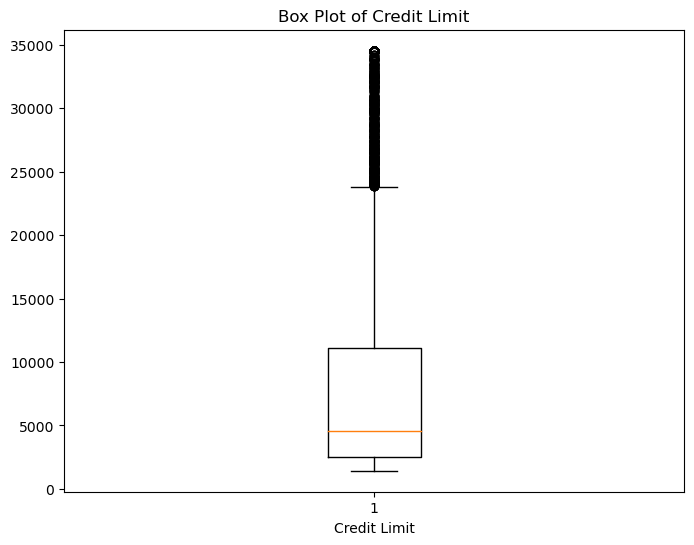

In [43]:
# boxplot for the Credit_Limit column
plt.figure(figsize=(8, 6))
plt.boxplot(df['Credit_Limit'], vert=True)
plt.title('Box Plot of Credit Limit')
plt.xlabel('Credit Limit')
plt.show()

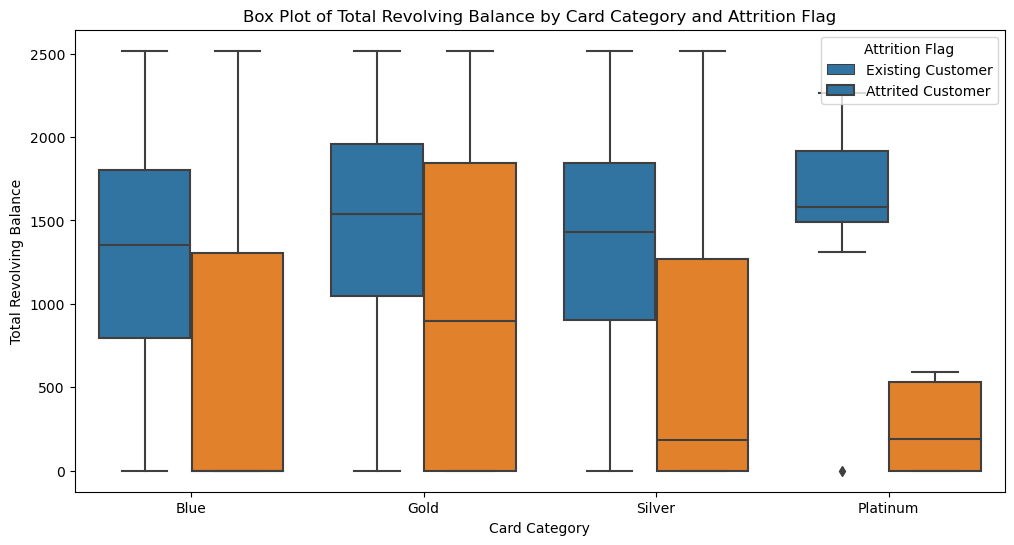

In [44]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Card_Category', y='Total_Revolving_Bal', hue='Attrition_Flag', data=data)
plt.title('Box Plot of Total Revolving Balance by Card Category and Attrition Flag')
plt.xlabel('Card Category')
plt.ylabel('Total Revolving Balance')
plt.legend(title='Attrition Flag', loc='upper right', labels=['Existing Customer', 'Attrited Customer'])
plt.show()

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Map Attrition_Flag values to 0 and 1
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Select only the numerical columns for standardization
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Standardize the numerical columns
scaler = StandardScaler()
numerical_columns_standardized = pd.DataFrame(scaler.fit_transform(numerical_columns), columns=numerical_columns.columns)

# Replace the original numerical columns with the standardized ones
df[numerical_columns.columns] = numerical_columns_standardized


In [46]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.802878,-0.437506,-0.165406,M,0.503368,High School,Married,$60K - $80K,Blue,0.384621,...,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,2.156861,-0.437506,0.333570,F,2.043199,Graduate,Single,Less than $40K,Blue,1.010715,...,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,-0.682769,-0.437506,0.583058,M,0.503368,Graduate,Married,$80K - $120K,Blue,0.008965,...,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,0.832862,-0.437506,-0.789126,F,1.273283,High School,Unknown,Less than $40K,Blue,-0.241473,...,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.814896,-0.437506,-0.789126,M,0.503368,Uneducated,Married,$60K - $80K,Blue,-1.869317,...,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155
